# Data Science 2 Project Milestone 2
EDA and Preliminary Model
Done by: Matt Henderson, Isaac Valencia, Patrick de Beer, Mattias Escudero, and Cristina Ravenna

Data Set found here: https://www.kaggle.com/datasets/nicholasjhana/energy-consumption-generation-prices-and-weather


Import all packages used in this checkpoint

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose


import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from random import randrange
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

import math
from sklearn.metrics import mean_squared_error



Upload Data Set

In [ ]:
data = pd.read_csv('energy_dataset.csv')
data = pd.DataFrame(data)

# EDA

**Initial Descriptions**

In [ ]:
data.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [ ]:
data.shape

(35064, 29)

Drop unnessesary columns

In [ ]:
data.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

In [ ]:
data = data.drop(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead'], axis=1)

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price actual,35064.0,57.884023,14.204083,9.33,49.3475,58.02,68.01,116.8


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   time          35064 non-null  object 
 1   price actual  35064 non-null  float64
dtypes: float64(1), object(1)
memory usage: 548.0+ KB


**Data Cleaning**

For non-time variables: Check for missing values and handle any inconsistencies. Search for N/A and variables that contradict the rules of each feature.

In [ ]:
data.isna().sum()

,0
time,0
price actual,0


Since we have one NA let's look to see what is happening in that row

In [ ]:
data[data.isna().any(axis=1)]

,time,price actual


We can see that this is an incomplete entry, but we can also see it is the last entry in the data set, therefore we have decided to remove this variable

In [ ]:
data = data.dropna()

In [ ]:
data.isna().sum()

,0
time,0
price actual,0


In [ ]:
data.shape

(35064, 2)

For non-time variables: Ensure correct data types for numerical variables.

In [ ]:
data.dtypes

,0
time,object
price actual,float64


Convert timestamps to datetime format for time-series analysis. Datetime format is the proper dtype for the time variable in python time-series models.

In [ ]:
data.columns

Index(['time', 'price actual'], dtype='object')

In [ ]:
data['time'] = pd.to_datetime(data['time'], utc=True)

**Formating our Data**

Make our time variable the index, and create a Series.

In [ ]:
data.set_index('time', inplace=True)

Check Fequency of the time feature: do we have a consistant order of time, or are there gaps in time?

In [ ]:
# Inferred frequency outputs h, telling us that our data increments by hour
print("Inferred frequency:", pd.infer_freq(data.index))

# Between each time stamp we are increasing by exactly one hour
time_diffs = data.index.to_series().diff().value_counts().sort_index()
print("\nTime difference counts:")
print(time_diffs)

Inferred frequency: h

Time difference counts:
time
0 days 01:00:00    35063
Name: count, dtype: int64


make into day averages.

In [ ]:
daily_data = data.resample('D').mean()

Make columns of Year, Month and Day catagories

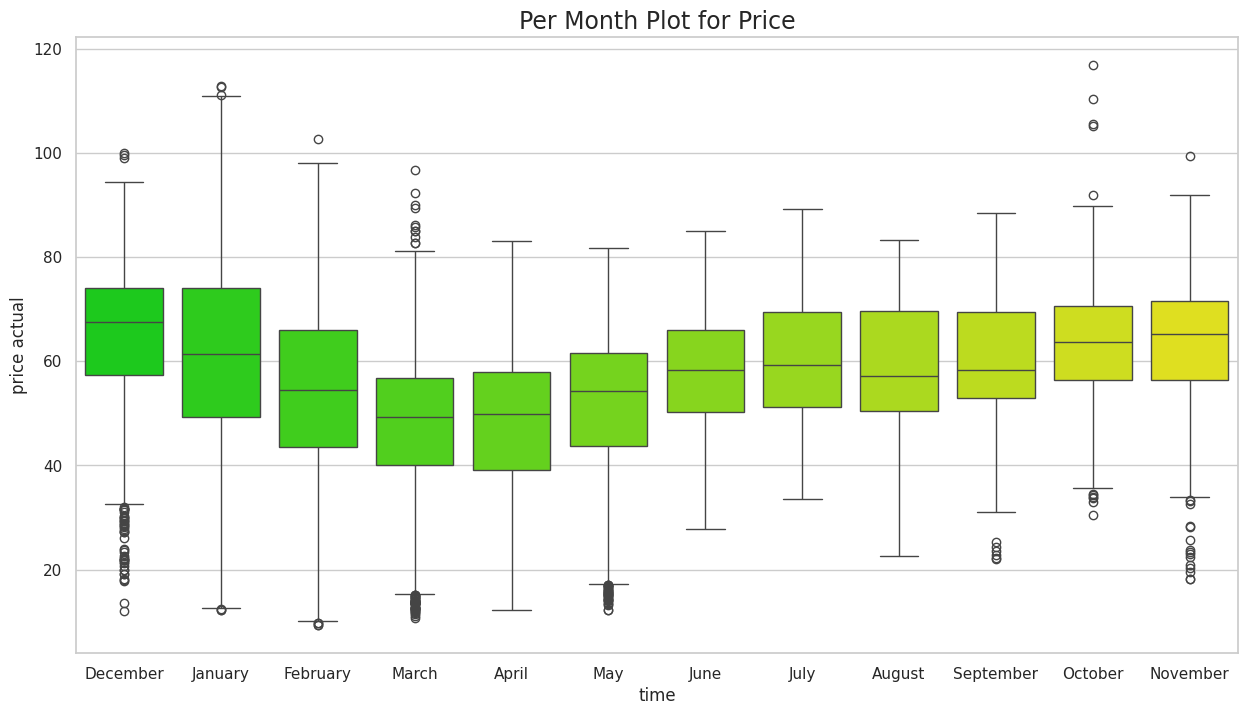

In [ ]:
plt.figure(figsize=(15, 8))

sns.boxplot(x = data.index.month_name(), y = data['price actual'], data=data, hue=data.index.month_name(), palette = sns.color_palette("blend:#00e600,#ffff00", 12) , legend=False);
plt.title('Per Month Plot for Price', fontsize=17);

Make groupings of month by year for box plot visualtization

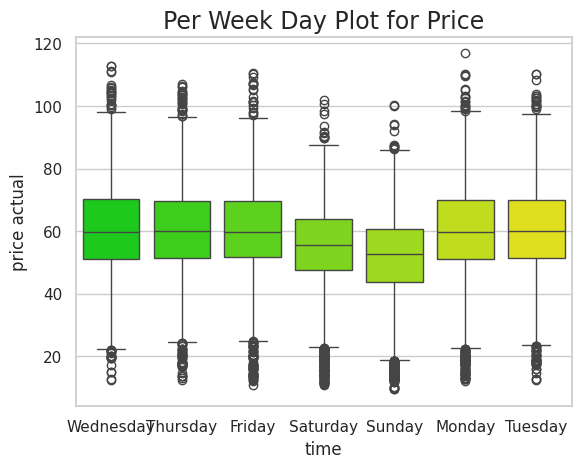

In [ ]:
sns.boxplot(x = data.index.day_name(), y = data['price actual'], data=data, hue=data.index.day_name(), palette = sns.color_palette("blend:#00e600,#ffff00", 7) , legend=False);
plt.title('Per Week Day Plot for Price', fontsize=17);

Make box plots of all x per day

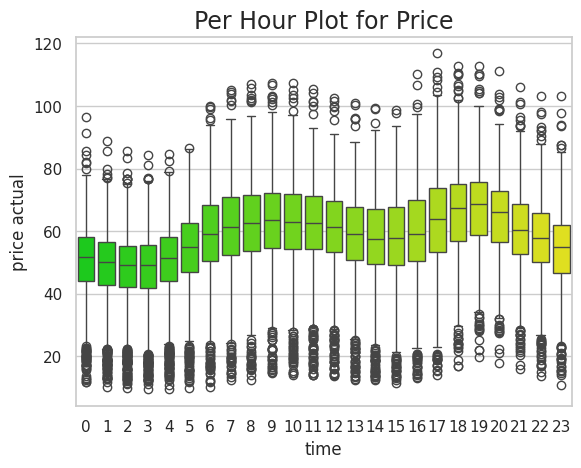

In [ ]:
sns.boxplot(x = data.index.hour, y = data['price actual'], data=data, hue=data.index.hour, palette = sns.color_palette("blend:#00e600,#ffff00", 24) , legend=False);
plt.title('Per Hour Plot for Price', fontsize=17);

Use Lineplot of Time vs. variables

<Axes: xlabel='time'>

<Figure size 2000x1000 with 0 Axes>

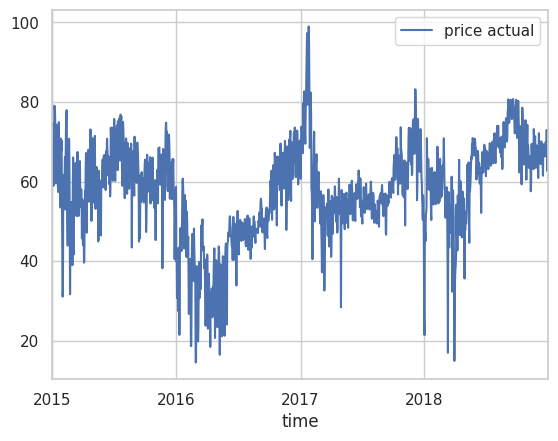

In [ ]:
plt.figure(figsize=(20, 10))
daily_data.plot()

**Decomposition**

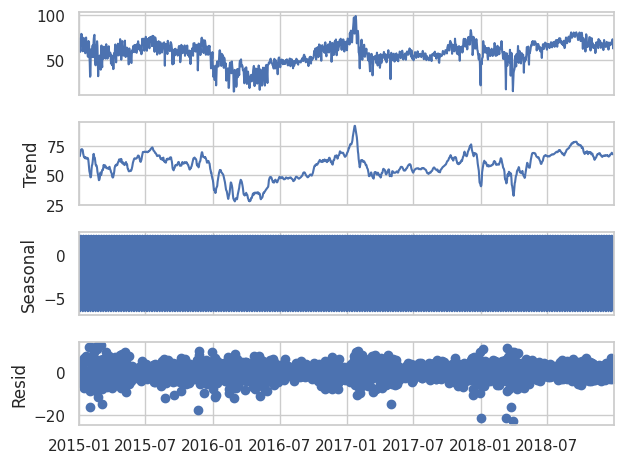

In [ ]:
seasonal_decompose(daily_data, model='additive').plot()
plt.show()

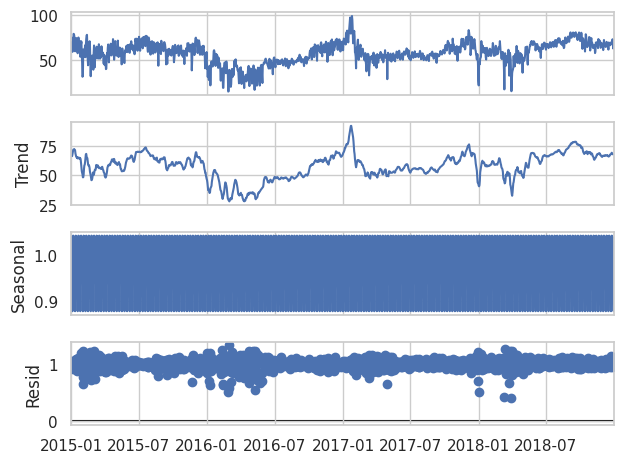

In [ ]:
seasonal_decompose(daily_data, model='multiplative').plot()
plt.show()

**Stationary or Non-Statinary test**

Using Dickey-Fuller test is our data Stationary

In [ ]:
Dicky_Fuller = adfuller(daily_data)
print("P-values is", Dicky_Fuller[1])

P-values is 0.050206376969170984


Visualize Box Plots for explanation of Data disribution and outliers

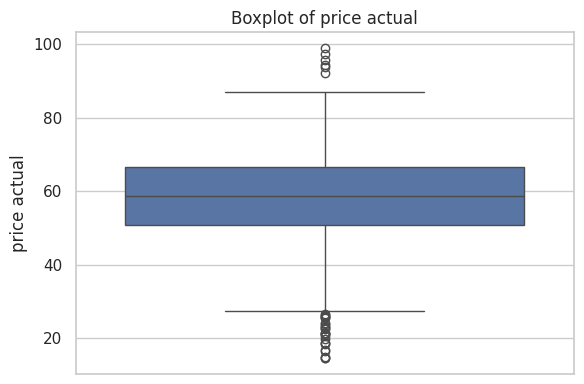

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.boxplot(y=daily_data['price actual'])
plt.title(f'Boxplot of price actual')
plt.tight_layout()
plt.show()

# Basic Model

 Seasonal Naive Model is our Baseline

In [ ]:
Naive_Model  = daily_data['price actual'].shift(365)

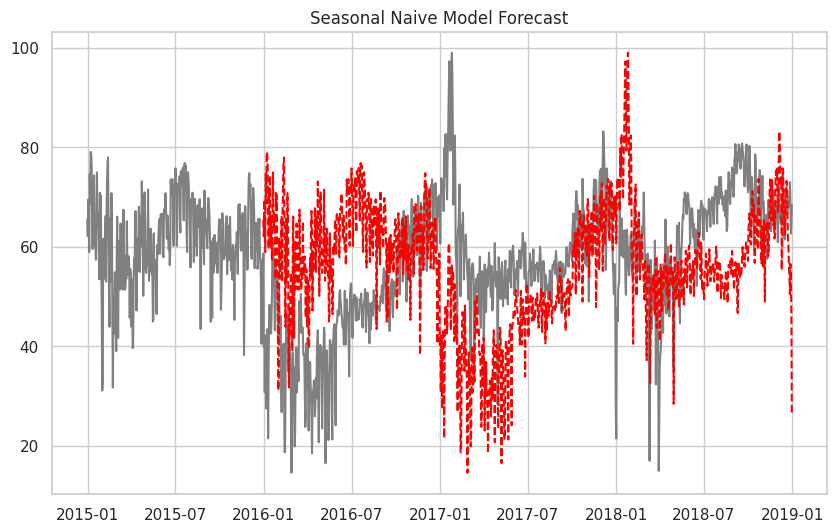

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(daily_data.index, daily_data['price actual'], color='grey')
plt.plot(Naive_Model.index, Naive_Model, color='red', linestyle='--')
plt.title('Seasonal Naive Model Forecast')
plt.show()

In [ ]:
daily_to_asses = daily_data['price actual'][730:]
Naive_Model = Naive_Model.dropna()[365:]

print(daily_to_asses.shape)
print(Naive_Model.shape)

(732,)
(732,)


In [ ]:
rmse = math.sqrt(mean_squared_error(daily_to_asses, Naive_Model))
print("Test RMSE: {}".format(rmse))

Test RMSE: 15.75986726238576


**ARIMA with Python:**

For our first model we want to make a test and train of 90 to 10

In [ ]:
X = daily_data.values
size = int(len(X) * 0.9)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]

print(train.shape)
test.shape

(1315, 1)


(147, 1)

ARIMA test done with p = 5 and d , q = 1

In [ ]:
predictions = []
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

<ipython-input-14-97026b0b0755>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted=%f, expected=%f' % (yhat, obs))


predicted=73.120366, expected=70.357500
predicted=69.122772, expected=70.915000
predicted=72.347145, expected=68.477083
predicted=69.320642, expected=68.770417
predicted=69.307949, expected=68.454167
predicted=69.881042, expected=67.244167
predicted=68.246861, expected=70.181250
predicted=70.917170, expected=68.139583
predicted=67.756616, expected=66.131250
predicted=67.157490, expected=71.287500
predicted=71.351165, expected=67.139583
predicted=65.867191, expected=63.110833
predicted=65.513461, expected=63.695833
predicted=66.283466, expected=69.045833
predicted=68.190291, expected=72.482500
predicted=70.877745, expected=74.951250
predicted=72.524632, expected=72.915417
predicted=70.033965, expected=70.425833
predicted=68.663388, expected=68.565000
predicted=68.626893, expected=70.559167
predicted=71.014454, expected=72.591667
predicted=72.688179, expected=73.819167
predicted=73.324627, expected=75.901667
predicted=74.550213, expected=74.980417
predicted=72.853364, expected=73.532083


iv. Calculate a final root mean squared error score (RMSE) for the predictions.

Test RMSE: 3.058356747304784


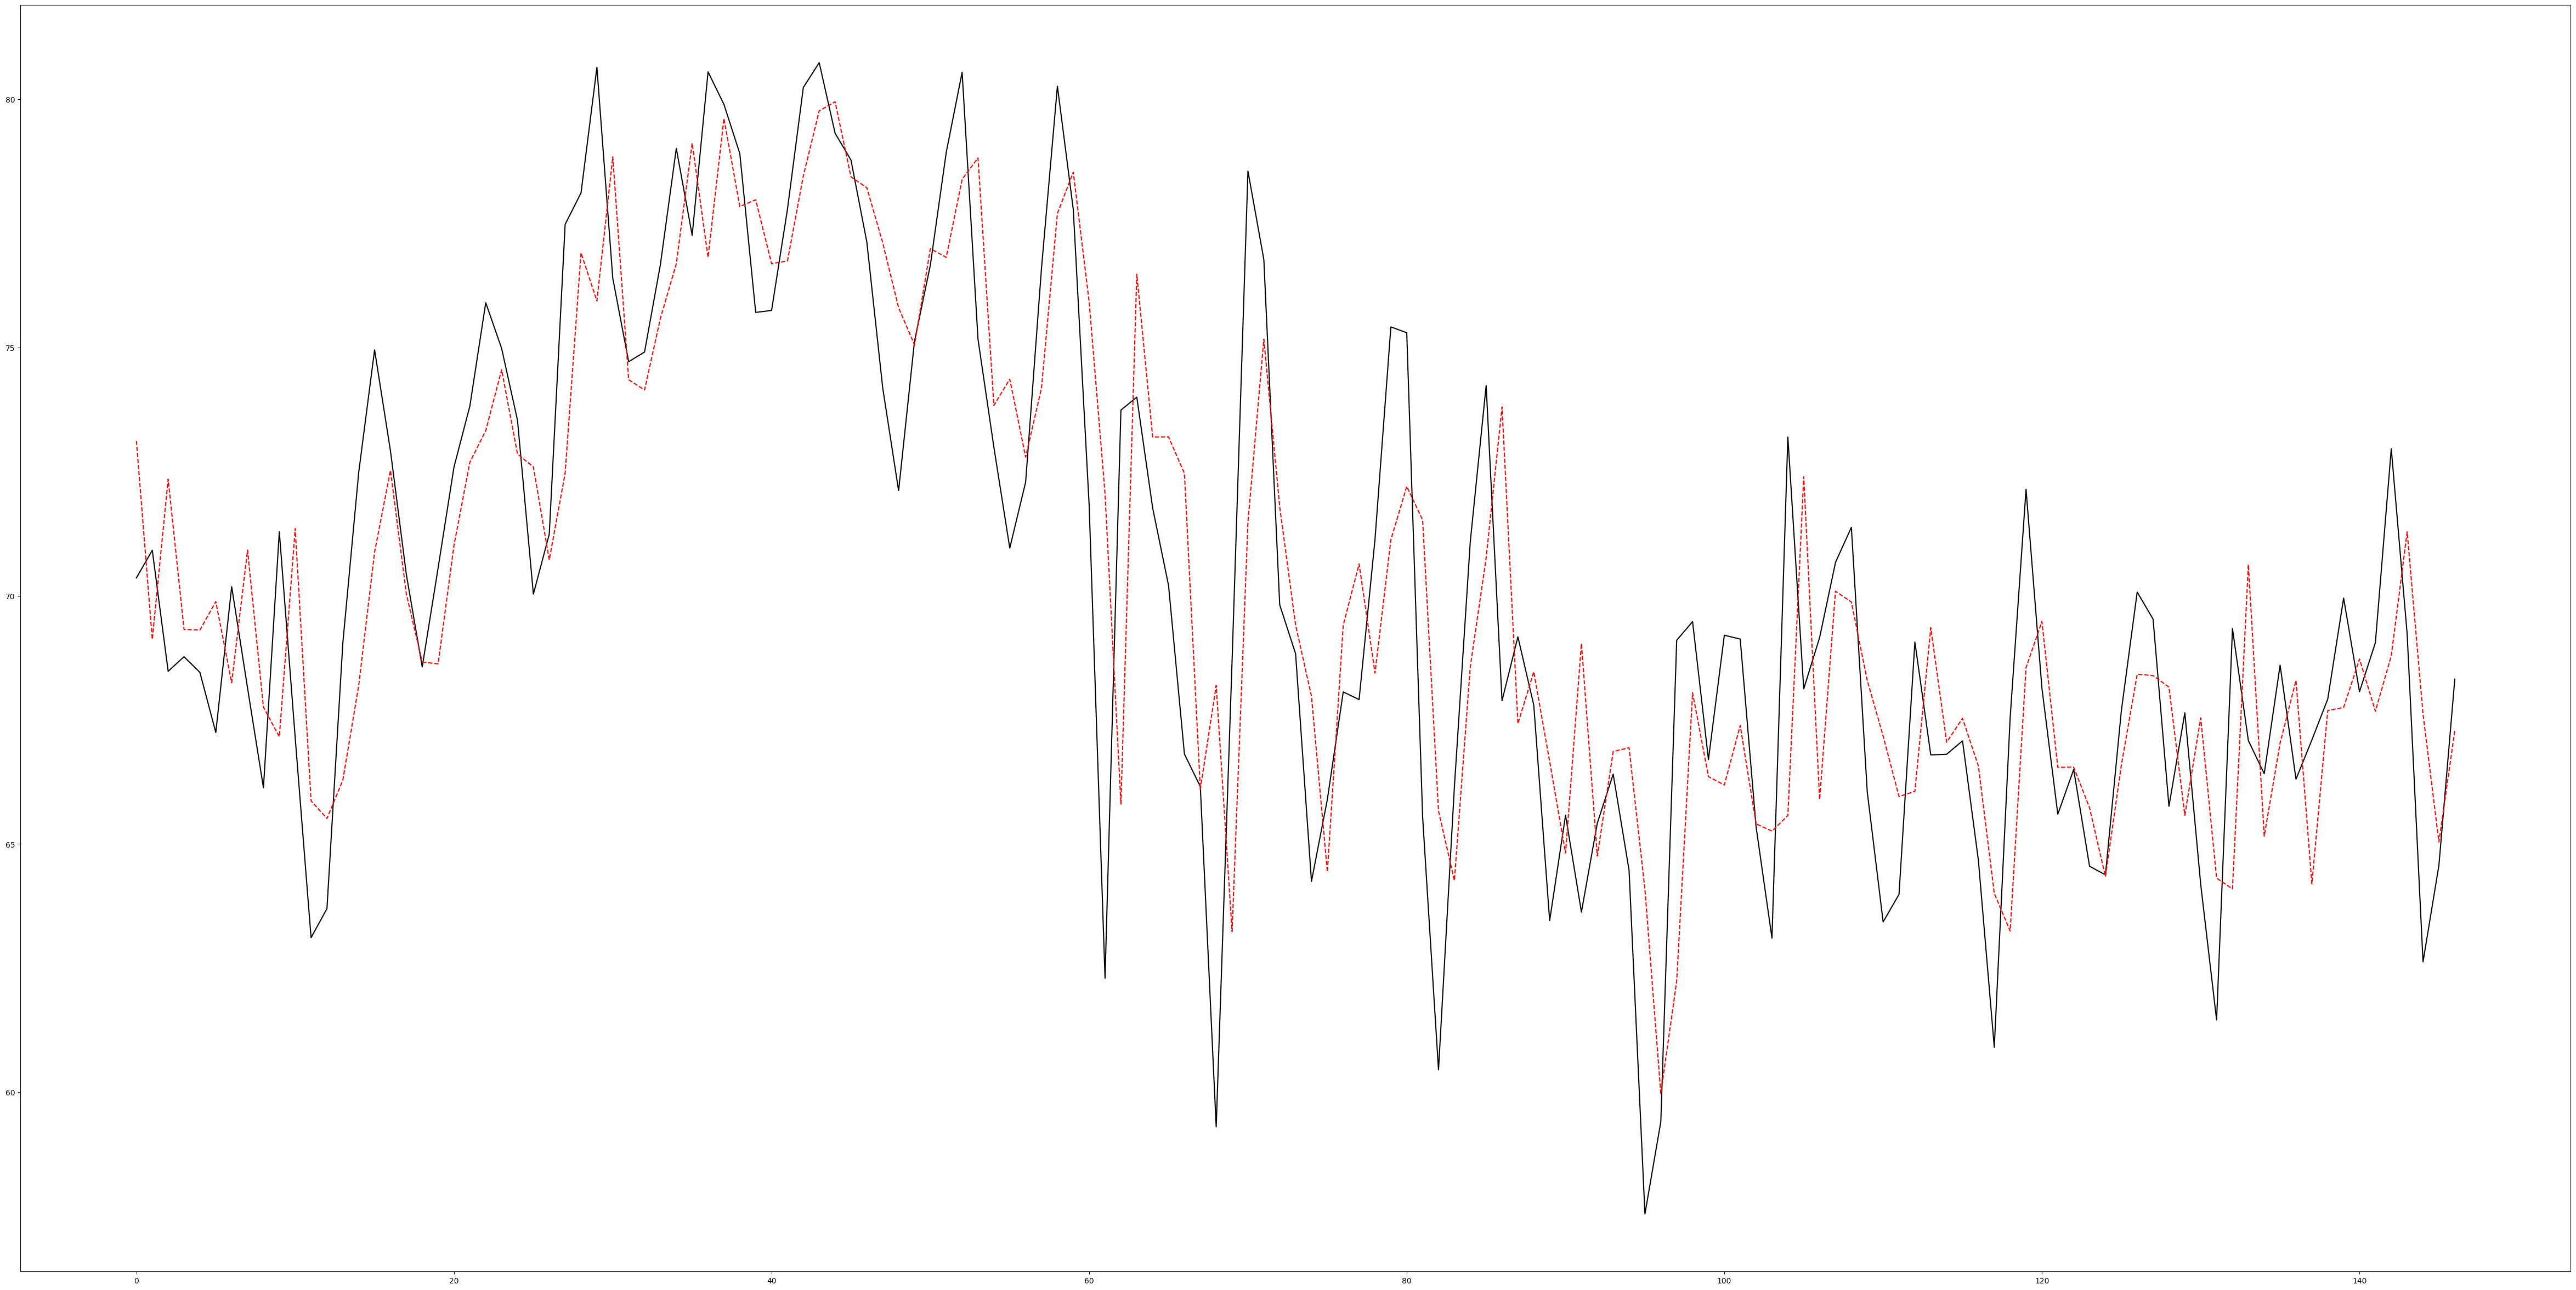

In [ ]:
plt.figure(figsize=(60, 30))

#evaluate forecasts
rmse = math.sqrt(mean_squared_error(test, predictions))
print("Test RMSE: {}".format(rmse))

#plot forecasts against actual outcomes
plt.plot(test, color = 'black')
plt.plot(predictions, color='red', linestyle='--')
plt.show()

In [ ]:
X = daily_data.values
size = int(len(X) * 0.9)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]

print(train.shape)
test.shape

(1315, 1)


(147, 1)

SARIMAX test done with p = 5 and d , q = 1 and P, D, Q are 1, with a seasonality of 7

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

predictions = []
for t in range(len(test)):
	model = SARIMAX(history, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
	model_fit = model.fit(disp=True)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))



<ipython-input-16-8a0784c9909d>:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted=%f, expected=%f' % (yhat, obs))


predicted=74.185681, expected=70.357500
predicted=70.752093, expected=70.915000
predicted=71.623051, expected=68.477083
predicted=69.097807, expected=68.770417
predicted=65.566647, expected=68.454167
predicted=65.553738, expected=67.244167
predicted=73.404117, expected=70.181250
predicted=71.138018, expected=68.139583
predicted=68.946195, expected=66.131250
predicted=67.726421, expected=71.287500
predicted=70.742432, expected=67.139583
predicted=64.234634, expected=63.110833
predicted=61.412146, expected=63.695833
predicted=70.283661, expected=69.045833
predicted=69.754902, expected=72.482500
predicted=71.578024, expected=74.951250
predicted=74.104084, expected=72.915417
predicted=71.862351, expected=70.425833
predicted=66.680395, expected=68.565000
predicted=65.681528, expected=70.559167
predicted=75.640727, expected=72.591667
predicted=73.002247, expected=73.819167
predicted=73.280744, expected=75.901667
predicted=75.275188, expected=74.980417
predicted=73.861072, expected=73.532083


Test RMSE: 2.8668956210114303


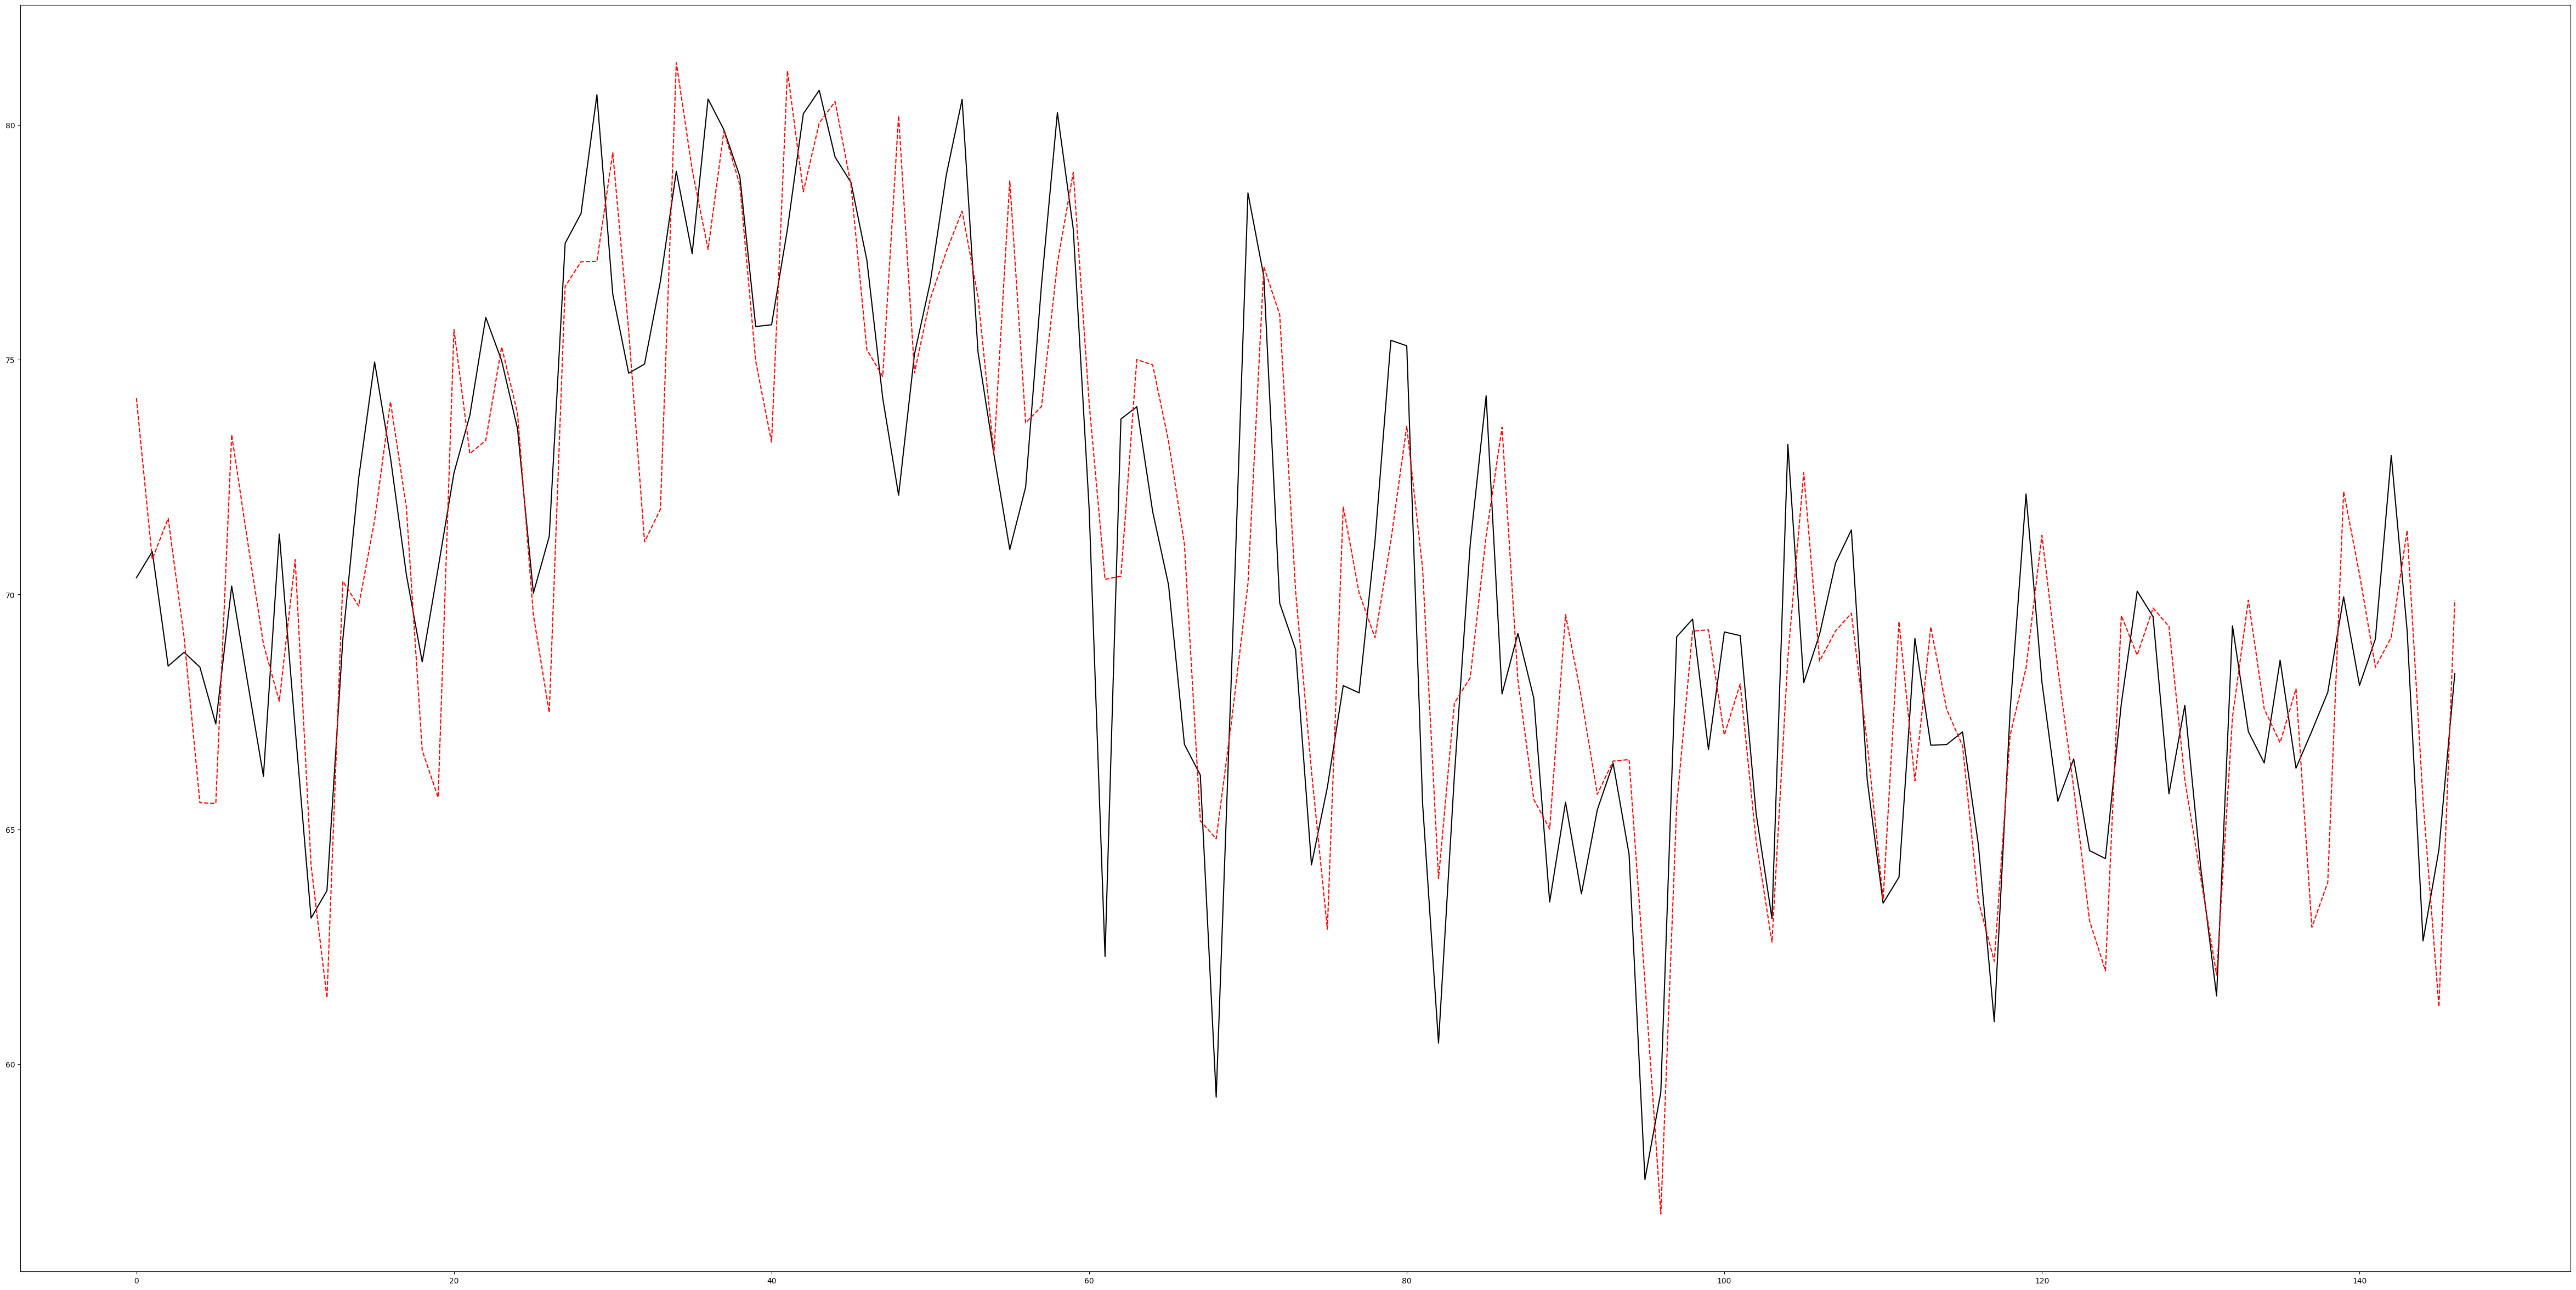

In [ ]:
plt.figure(figsize=(60, 30))

#evaluate forecasts
rmse = math.sqrt(mean_squared_error(test, predictions))
print("Test RMSE: {}".format(rmse))

#plot forecasts against actual outcomes
plt.plot(test, color = 'black')
plt.plot(predictions, color='red', linestyle='--')
plt.show()